## visualize data

In [2]:
import pandas as pd

path = "./data/motion_sense_data.csv"

data = pd.read_csv(path)
data

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,weight,height,age,gender,activity
0,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1.0,102.0,188.0,46.0,1.0,downstairs
1,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1.0,102.0,188.0,46.0,1.0,downstairs
2,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1.0,102.0,188.0,46.0,1.0,downstairs
3,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1.0,102.0,188.0,46.0,1.0,downstairs
4,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1.0,102.0,188.0,46.0,1.0,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,1.446270,2.409207,-1.052698,0.034354,-0.574501,0.060144,24.0,74.0,173.0,18.0,0.0,walking
1412861,0.602010,2.675064,-0.472482,0.547953,-0.481645,-0.232273,24.0,74.0,173.0,18.0,0.0,walking
1412862,1.125564,4.413143,1.581002,0.910034,0.194606,-0.770222,24.0,74.0,173.0,18.0,0.0,walking
1412863,0.086910,0.436147,1.762577,0.811333,0.424518,-0.716784,24.0,74.0,173.0,18.0,0.0,walking


## balance data

In [7]:
### balance data with oversampling SMOTE

from imblearn.over_sampling import SMOTE

X = data.drop('activity', axis=1)
y = data['activity']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

data_sm = pd.concat([X_sm, y_sm], axis=1)
data_sm.to_csv("./data/motion_sense_data_sm.csv", index=False)

In [8]:
data_sm["activity"].value_counts()

activity
downstairs    344288
jogging       344288
sitting       344288
standing      344288
upstairs      344288
walking       344288
Name: count, dtype: int64

## separate by gender

In [12]:
import pandas as pd

data_sm = pd.read_csv("./data/motion_sense_data_sm.csv")

In [13]:
data_sm["gender"].value_counts()

gender
1.0    1179888
0.0     885840
Name: count, dtype: int64

In [14]:
data_female = data_sm[data_sm["gender"] == 0]
data_male = data_sm[data_sm["gender"] == 1]
data_male

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,weight,height,age,gender,activity
0,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1.0,102.0,188.0,46.0,1.0,downstairs
1,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1.0,102.0,188.0,46.0,1.0,downstairs
2,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1.0,102.0,188.0,46.0,1.0,downstairs
3,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1.0,102.0,188.0,46.0,1.0,downstairs
4,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1.0,102.0,188.0,46.0,1.0,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...
2065721,1.844414,-0.709689,-0.393713,-0.338553,0.309578,-0.399193,17.0,76.0,180.0,26.0,1.0,upstairs
2065723,-0.120025,3.900765,0.105771,0.389296,-0.060636,-0.017247,17.0,76.0,180.0,26.0,1.0,upstairs
2065724,1.149925,0.967907,1.011933,-0.147735,0.003548,0.186704,11.0,70.0,178.0,24.0,1.0,upstairs
2065726,1.190189,6.012605,1.744576,0.469483,-0.299237,-0.572555,14.0,70.0,180.0,35.0,1.0,upstairs


In [15]:
### split data into train and test

from sklearn.model_selection import train_test_split

X = data_male.drop('activity', axis=1)
y = data_male['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
test.__len__() * 0.20

47195.600000000006

In [16]:
### remove random 47195 rows from test data

test = test.sample(frac=1).reset_index(drop=True)
test = test.drop(test.index[:47195])
test

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,weight,height,age,gender,activity
47195,-0.971386,-1.567379,0.665641,-0.841507,-0.830222,0.333645,22.0,100.0,186.0,31.0,1.0,jogging
47196,2.327240,-1.183494,1.153802,0.113974,-0.205905,0.666186,6.0,76.0,180.0,28.0,1.0,walking
47197,-0.505595,1.279635,0.608995,0.777196,-0.287277,-0.030651,13.0,60.0,178.0,33.0,1.0,upstairs
47198,-3.421773,1.703000,-5.051254,-0.525139,0.939208,0.566814,13.0,60.0,178.0,33.0,1.0,jogging
47199,0.040450,-0.082862,-0.004265,-0.089515,-0.019412,-0.007906,6.0,76.0,180.0,28.0,1.0,standing
...,...,...,...,...,...,...,...,...,...,...,...,...
235973,0.084884,0.015063,-0.016658,0.028286,0.009045,-0.001316,22.0,100.0,186.0,31.0,1.0,standing
235974,-1.906555,1.597580,0.412441,0.100634,-0.633742,0.611651,6.0,76.0,180.0,28.0,1.0,upstairs
235975,-0.011126,-0.004001,0.011144,0.003221,0.001887,0.000273,17.0,76.0,180.0,26.0,1.0,sitting
235976,0.580739,-1.005211,0.246815,0.076936,-0.455427,0.341999,17.0,76.0,180.0,26.0,1.0,upstairs


In [17]:
### get random 47195 rows from data_female

data_female_test = data_female.sample(n=47195)
data_female_test

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,weight,height,age,gender,activity
886138,0.182692,0.068649,-0.164427,-0.047605,0.047322,-0.047121,18.0,54.0,164.0,26.0,0.0,standing
644539,0.014392,-0.168317,-0.004077,-0.016718,-0.003816,0.014032,5.0,48.0,164.0,23.0,0.0,standing
647312,0.010129,0.007374,0.001006,-0.000870,0.009623,-0.037501,5.0,48.0,164.0,23.0,0.0,standing
1098286,-2.570316,0.126119,-1.247617,0.383356,0.626591,0.111684,5.0,48.0,164.0,23.0,0.0,walking
571819,-0.002924,-0.008430,0.009591,-0.001996,0.012677,-0.001891,16.0,96.0,172.0,29.0,0.0,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...
1509836,-1.180494,-1.842498,-1.653124,-0.166632,-0.054491,-0.225744,5.0,48.0,164.0,23.0,0.0,downstairs
196126,2.110805,0.586627,1.572419,-0.062884,-0.708214,0.052252,16.0,96.0,172.0,29.0,0.0,jogging
2001896,0.017684,0.198296,0.000384,-0.010188,0.009791,-0.007068,16.0,96.0,172.0,29.0,0.0,upstairs
1563810,-0.015001,0.023344,0.288220,-0.005017,-0.430970,0.014384,19.0,78.0,164.0,28.0,0.0,downstairs


In [18]:
test = pd.concat([test, data_female_test], axis=0)
test

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,weight,height,age,gender,activity
47195,-0.971386,-1.567379,0.665641,-0.841507,-0.830222,0.333645,22.0,100.0,186.0,31.0,1.0,jogging
47196,2.327240,-1.183494,1.153802,0.113974,-0.205905,0.666186,6.0,76.0,180.0,28.0,1.0,walking
47197,-0.505595,1.279635,0.608995,0.777196,-0.287277,-0.030651,13.0,60.0,178.0,33.0,1.0,upstairs
47198,-3.421773,1.703000,-5.051254,-0.525139,0.939208,0.566814,13.0,60.0,178.0,33.0,1.0,jogging
47199,0.040450,-0.082862,-0.004265,-0.089515,-0.019412,-0.007906,6.0,76.0,180.0,28.0,1.0,standing
...,...,...,...,...,...,...,...,...,...,...,...,...
1509836,-1.180494,-1.842498,-1.653124,-0.166632,-0.054491,-0.225744,5.0,48.0,164.0,23.0,0.0,downstairs
196126,2.110805,0.586627,1.572419,-0.062884,-0.708214,0.052252,16.0,96.0,172.0,29.0,0.0,jogging
2001896,0.017684,0.198296,0.000384,-0.010188,0.009791,-0.007068,16.0,96.0,172.0,29.0,0.0,upstairs
1563810,-0.015001,0.023344,0.288220,-0.005017,-0.430970,0.014384,19.0,78.0,164.0,28.0,0.0,downstairs


In [19]:
### order by activity and code

train = train.sort_values(by=['activity', 'code'])
test = test.sort_values(by=['activity', 'code'])

In [20]:
### label encode activity

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['activity'] = le.fit_transform(train['activity'])
test['activity'] = le.transform(test['activity'])

le.classes_

array(['downstairs', 'jogging', 'sitting', 'standing', 'upstairs',
       'walking'], dtype=object)

In [16]:
train = train.drop(columns=["code", "weight", "height", "age"])
test = test.drop(columns=["code", "weight", "height", "age"])

In [20]:
test

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,gender,activity
47249,-0.702027,1.816030,0.869197,0.662776,0.617448,0.147426,1.0,0
47277,-0.127212,-0.581997,0.467010,0.034859,-0.227692,0.110728,1.0,0
47305,-0.548854,4.831874,-2.182188,-0.105475,0.095405,-0.189149,1.0,0
47397,1.397476,-1.163798,0.098087,0.237726,0.055993,-0.251518,1.0,0
47517,1.900301,-1.131043,0.298332,0.253327,0.061950,-0.376362,1.0,0
...,...,...,...,...,...,...,...,...
1347441,0.258462,0.785251,0.024718,-0.714383,1.293127,-0.938433,0.0,5
1412546,1.238141,1.128726,1.248391,0.336987,-0.377715,0.263689,0.0,5
1346128,0.541536,1.434980,1.330623,-0.524233,-0.198933,0.029961,0.0,5
1411441,-0.460049,-4.325561,1.931726,0.567419,2.189623,0.482497,0.0,5


In [21]:
train["gender"].value_counts()

gender
1.0    943910
Name: count, dtype: int64

In [22]:
test["gender"].value_counts()

gender
1.0    188783
0.0     47195
Name: count, dtype: int64

## standardize data

In [23]:
### normalize sensor data 

from sklearn.preprocessing import StandardScaler

sensor_columns = ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z", "rotationRate.x", "rotationRate.y", "rotationRate.z"]

scaler = StandardScaler()
train[sensor_columns] = scaler.fit_transform(train[sensor_columns])
test[sensor_columns] = scaler.transform(test[sensor_columns])

train.to_csv("./data/motion_sense_train.csv", index=False)
test.to_csv("./data/motion_sense_test.csv", index=False)

In [23]:
import numpy as np
import pandas as pd

sensor_data = pd.read_csv("./data/motion_sense_test.csv", usecols=["rotationRate.x", "rotationRate.y", "rotationRate.z", "userAcceleration.x", "userAcceleration.y", "userAcceleration.z", "activity"])

buffer_size = 256  # buffer size
frequency_hz = 50 

def apply_fft_on_window(window_data):
    processed_data = []
    
    fft_gx = np.fft.fft(window_data[:, 0])  # gyro x
    fft_gy = np.fft.fft(window_data[:, 1])  # gyro y
    fft_gz = np.fft.fft(window_data[:, 2])  # gyro z
    fft_ax = np.fft.fft(window_data[:, 3])  # acc x
    fft_ay = np.fft.fft(window_data[:, 4])  # acc y
    fft_az = np.fft.fft(window_data[:, 5])  # acc z
    
    freq = np.fft.fftfreq(buffer_size, d=1/frequency_hz)

    class_label = pd.DataFrame(window_data[:, 6]).mode()[0][0]
    
    return freq, np.abs(fft_ax), np.abs(fft_ay), np.abs(fft_az), np.abs(fft_gx), np.abs(fft_gy), np.abs(fft_gz), class_label

num_windows = (len(sensor_data) - buffer_size) + 1

In [24]:
fft_data = []

for i in range(0, num_windows, buffer_size):
    window_data = sensor_data.values[i:i + buffer_size]
    
    freq, fft_ax, fft_ay, fft_az, fft_gx, fft_gy, fft_gz, class_labels = apply_fft_on_window(window_data)
    
    fft_features = {
        'window': i // buffer_size + 1,       
        'freq': freq,                         
        'fft_acc_x': fft_ax,
        'fft_acc_y': fft_ay,
        'fft_acc_z': fft_az,
        'fft_gyro_x': fft_gx,
        'fft_gyro_y': fft_gy,
        'fft_gyro_z': fft_gz,
        'class': class_labels
    }
    
    fft_data.append(fft_features)

df_fft = pd.DataFrame(fft_data)

df_fft.to_csv("processed_test_data_activity_male_and_female.csv", index=False)

print("Dados FFT armazenados com sucesso.")

Dados FFT armazenados com sucesso.


## Test the data

In [48]:
from src.data_preprocessing import matrix_fourier_adjust
import pandas as pd

df_fft = pd.read_csv("processed_test_data_activity_male.csv")

X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z, class_labels = matrix_fourier_adjust(df_fft, testing=False)

In [49]:
### load traind model
from tensorflow.keras.models import load_model

model_path = "./src/models/HAR_trial_1.h5"

model = load_model(model_path)

In [50]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

# evaluate model with confusion matrix
y_pred = [int(x) for x in predictions.argmax(axis=1)]
y_true = [int(x) for x in class_labels]

cm = confusion_matrix(y_true, y_pred)
print(cm)

# cm to percentage matrix with 4 decimal places
cm = np.round(cm / cm.sum(axis=1)[:, np.newaxis], 3)
print(cm)

10/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

/Users/paulaperazzo/Documents/masters/ic2/ExAI - Final Project/.venv/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer', 'input_layer_1', 'input_layer_2', 'input_layer_3', 'input_layer_4', 'input_layer_5']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*')
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[ 95   4   0   0  17   4]
 [  4 109   0   0   0  11]
 [  0   1 120   4   0   0]
 [  0   0   5 117   1   0]
 [ 15   0   0   0 104   1]
 [  9   5   0   0   0 111]]
[[0.792 0.033 0.    0.    0.142 0.033]
 [0.032 0.879 0.    0.    0.    0.089]
 [0.    0.008 0.96  0.032 0.    0.   ]
 [0.    0.    0.041 0.951 0.008 0.   ]
 [0.125 0.    0.    0.    0.867 0.008]
 [0.072 0.04  0.    0.    0.    0.888]]


/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_61114/294570611.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true = [int(x) for x in class_labels]


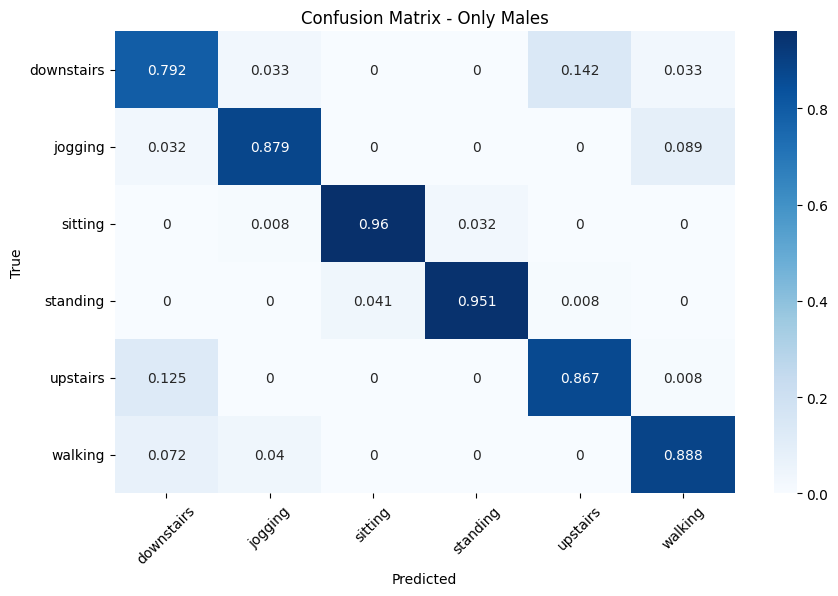

In [51]:
# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# change labels to activity names
plt.xticks(ticks=np.arange(6) + 0.5, labels=le.classes_, rotation=45)
plt.yticks(ticks=np.arange(6) + 0.5, labels=le.classes_, rotation=0)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Only Males")
plt.show()

In [52]:
### classification report

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

  downstairs       0.77      0.79      0.78       120
     jogging       0.92      0.88      0.90       124
     sitting       0.96      0.96      0.96       125
    standing       0.97      0.95      0.96       123
    upstairs       0.85      0.87      0.86       120
     walking       0.87      0.89      0.88       125

    accuracy                           0.89       737
   macro avg       0.89      0.89      0.89       737
weighted avg       0.89      0.89      0.89       737



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


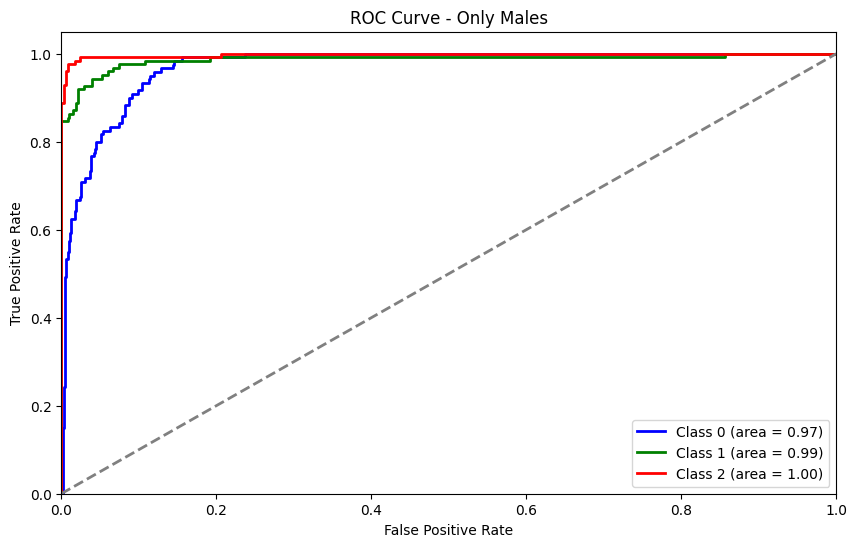

In [53]:
### plot roc curve

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


n_classes = 3
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_proba = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Only Males')
plt.legend(loc="lower right")
plt.show()

### adding female participants

In [54]:
from src.data_preprocessing import matrix_fourier_adjust
import pandas as pd

df_fft = pd.read_csv("processed_test_data_activity_male_and_female.csv")

X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z, class_labels = matrix_fourier_adjust(df_fft, testing=False)

In [55]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

# evaluate model with confusion matrix
y_pred = [int(x) for x in predictions.argmax(axis=1)]
y_true = [int(x) for x in class_labels]

cm = confusion_matrix(y_true, y_pred)
print(cm)

# cm to percentage matrix with 4 decimal places
cm = np.round(cm / cm.sum(axis=1)[:, np.newaxis], 3)
print(cm)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[111  14   0   0  23   4]
 [  4 142   0   1   0   7]
 [  0   1 150   4   0   0]
 [  0   0   5 148   0   0]
 [ 28   1   0   2 119   2]
 [ 15  14   0   2   5 119]]
[[0.73  0.092 0.    0.    0.151 0.026]
 [0.026 0.922 0.    0.006 0.    0.045]
 [0.    0.006 0.968 0.026 0.    0.   ]
 [0.    0.    0.033 0.967 0.    0.   ]
 [0.184 0.007 0.    0.013 0.783 0.013]
 [0.097 0.09  0.    0.013 0.032 0.768]]


/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_61114/294570611.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true = [int(x) for x in class_labels]


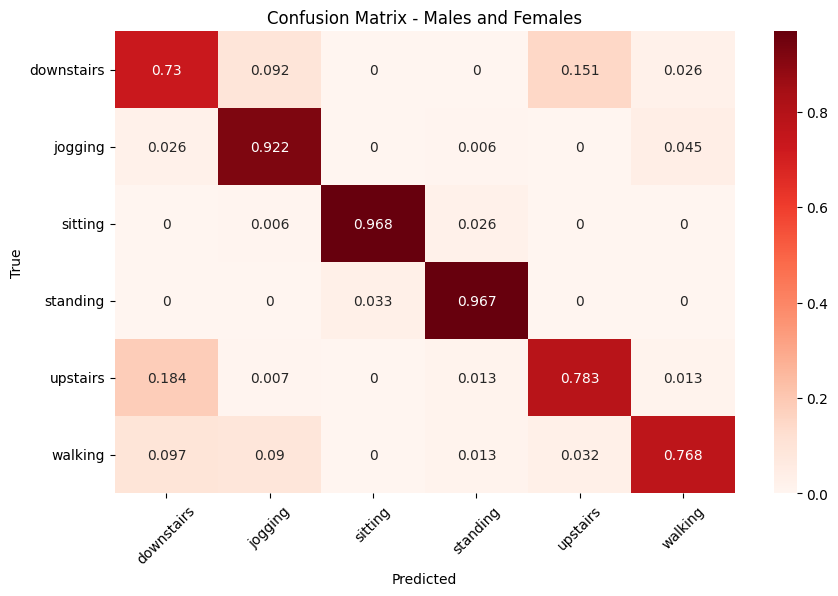

In [56]:
# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
# change labels to activity names
plt.xticks(ticks=np.arange(6) + 0.5, labels=le.classes_, rotation=45)
plt.yticks(ticks=np.arange(6) + 0.5, labels=le.classes_, rotation=0)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Males and Females")
plt.show()

In [57]:
### classification report

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

  downstairs       0.70      0.73      0.72       152
     jogging       0.83      0.92      0.87       154
     sitting       0.97      0.97      0.97       155
    standing       0.94      0.97      0.95       153
    upstairs       0.81      0.78      0.80       152
     walking       0.90      0.77      0.83       155

    accuracy                           0.86       921
   macro avg       0.86      0.86      0.86       921
weighted avg       0.86      0.86      0.86       921



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


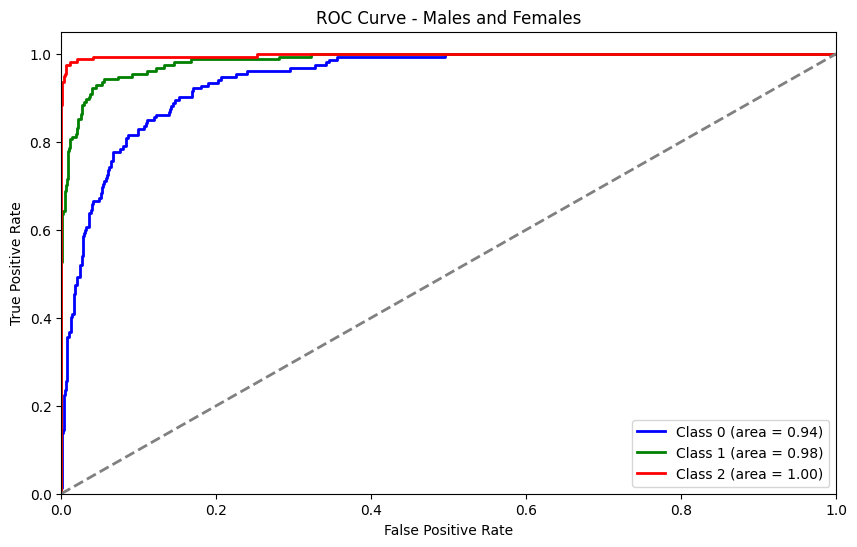

In [58]:
### plot roc curve

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


n_classes = 3
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_proba = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Males and Females')
plt.legend(loc="lower right")
plt.show()

## ML with rejection

In [77]:
import numpy as np
from scipy.stats import entropy
from sklearn.metrics import accuracy_score, confusion_matrix

def calculate_entropy(predictions):
    """Calculate entropy for a given set of predictions (softmax probabilities)."""
    return entropy(predictions, axis=1)

def predict_with_rejector(model, X_test, threshold):
    """Make predictions with a rejection mechanism based on entropy."""
    softmax_outputs = model.predict(X_test)
    entropies = calculate_entropy(softmax_outputs)

    predictions = np.argmax(softmax_outputs, axis=1)
    rejected = entropies > threshold
    accepted = ~rejected

    return predictions, accepted, rejected, entropies

# entropy_threshold = 1.5
entropy_thresholds = [1.5, 1.4, 1.3, 1.2, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
X_test = [X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z]

for i in range(len(entropy_thresholds)):
    entropy_threshold = entropy_thresholds[i]
    predictions, accepted, rejected, entropies = predict_with_rejector(model, X_test, entropy_threshold)

    y_true = np.array(class_labels)

    # Only evaluate accuracy on accepted instances
    accuracy_with_rejection = accuracy_score(y_true[accepted], predictions[accepted])

    reject_rate = np.mean(rejected)  # Proportion of rejected samples

    print(f"Entropy threshold: {entropy_threshold}")
    print(f"Accuracy with rejection: {accuracy_with_rejection}")
    print(f"Rejection rate: {reject_rate * 100:.2f}%")

    if entropy_threshold < 0:
        break

    # Confusion matrix for accepted predictions
    # conf_matrix = confusion_matrix(y_true[accepted], predictions[accepted])
    # print("Confusion Matrix for Accepted Predictions:\n", conf_matrix)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.5
Accuracy with rejection: 0.8566775244299675
Rejection rate: 0.00%
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entropy threshold: 1.4
Accuracy with rejection: 0.8566775244299675
Rejection rate: 0.00%
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entropy threshold: 1.3
Accuracy with rejection: 0.8576086956521739
Rejection rate: 0.11%
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entropy threshold: 1.2
Accuracy with rejection: 0.8576086956521739
Rejection rate: 0.11%
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entropy threshold: 1.1
Accuracy with rejection: 0.8571428571428571
Rejection rate: 0.43%
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entropy threshold: 1.0
Accuracy with rejection: 0.8620309050772627
Rejection rate: 1.63%
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entropy threshold: 0.9
Accuracy with rejection: 0.8651685393258427
Rejection rate: 3.37%
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entropy threshold: 0.8
Accuracy with rejection: 0.872852233676976

In [78]:
# Confusion matrix for accepted predictions
conf_matrix = confusion_matrix(y_true[accepted], predictions[accepted])
print("Confusion Matrix for Accepted Predictions:\n", conf_matrix)

Confusion Matrix for Accepted Predictions:
 [[ 71   8   0   0   9   0]
 [  3 131   0   0   0   2]
 [  0   1 140   2   0   0]
 [  0   0   1 141   0   0]
 [ 10   0   0   0  89   0]
 [  1   8   0   2   2  83]]


In [80]:
### percentage confusion matrix

# cm to percentage matrix with 4 decimal places
cm = np.round(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis], 3)

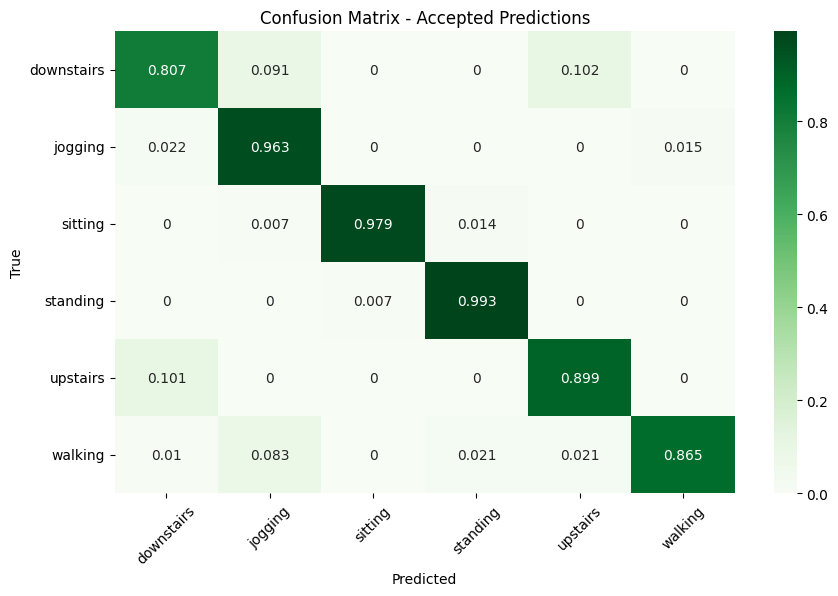

In [85]:
### plt confusion matrix

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
# change labels to activity names
plt.xticks(ticks=np.arange(6) + 0.5, labels=le.classes_, rotation=45)
plt.yticks(ticks=np.arange(6) + 0.5, labels=le.classes_, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Accepted Predictions")
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━

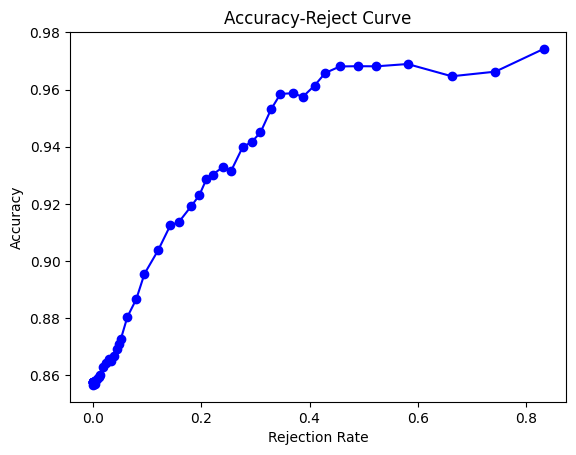

In [83]:
# Optional: Plot Accuracy-Reject Curve (ARC)
import matplotlib.pyplot as plt

def plot_accuracy_reject_curve(model, X_test, y_true):
    thresholds = np.linspace(0, np.max(entropies), 50)  # Range of entropy thresholds
    accuracies = []
    reject_rates = []

    for threshold in thresholds:
        _, accepted, _, _ = predict_with_rejector(model, X_test, threshold)
        if np.any(accepted):  # Ensure there are accepted samples to avoid division by zero
            accuracy = accuracy_score(y_true[accepted], predictions[accepted])
            accuracies.append(accuracy)
            reject_rates.append(1 - np.mean(accepted))  # Rejection rate is the proportion of rejected samples

    plt.plot(reject_rates, accuracies, marker='o', color='b')
    plt.xlabel("Rejection Rate")
    plt.ylabel("Accuracy")
    plt.title("Accuracy-Reject Curve")
    plt.show()

# Plot the ARC
plot_accuracy_reject_curve(model, X_test, y_true)